# THE TMDb_MOVIES DATASET

## Table of contents

    

### Introduction

For my project I have decided to use the TMDb_Movies Dataset.

The dataset consists of almost 11000 rows and 21 columns. It contains financial information (i.e. budget and revenue) as well as generic information such as cast, tagline and popularity score for movies released between 1960 and 2015.

#### Questions:

    Which Director collected more year best selling movie?
    Has the year average movie budget increased or decreased for most recent movies?
    Does the increase/decrease translate in more profitable movies?
    How popularity and profitable movies are related?
    Does a bigger budget result in a higher popularity score?
    Which genre was the most represented over the years? Can we see any changes between old and recent movies?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Stop floats from displaying as scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Drawing clear sized graphs
plt.rcParams['figure.figsize']= (15, 15)

df = pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


# EXPLORING

In [ ]:
df.shape

(10866, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

# WRANGLING

**COLUMNS DROP**

-imdb_id: is the database entry ID; does not add any value as we already have the ID column which has no missing                 values. 

-budget & revenue: are respectively the budget and the revenue of a specific movie for the release year. However, is                      not specified the currency and there are already the budget_adj & revenue_adj normalized for the                      year 2010 and the USD currency.

-homepage: is the homepage of the movie. Does not add any value.

-tagline & keywords & overview: are specific features of each movie not useful for the analysis.

-release_date: it is the release date of the movie. I will use the release_year for the analysis

-production_company & runtime: are respectively the name of the production company and the minutes of the movie

-vote_count	& vote_average: are respectively the number of votes and the mean grade for each movie. As we don't know                               how the voting process occurred and given the inconsistency of the values, they are not                               useful for the analysis.


In [ ]:
df = df.drop(['imdb_id', 'budget','revenue','homepage','tagline','keywords','overview','vote_count','vote_average',
              'release_date', 'production_companies', 'runtime'], axis=1)
df.head() #checking the columns were dropped

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,"137,999,939.28","1,392,445,892.52"
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,"137,999,939.28","348,161,292.49"
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,"101,199,955.47","271,619,025.41"
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,"183,999,919.04","1,902,723,129.80"
4,168259,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,"174,799,923.09","1,385,748,801.47"


**DUPLICATES**

The only duplicates that will have an impact on the analysis would be the entire row duplicates. 

Duplicates along the column(s) are possible among different entries (i.e. two movies with same title but different directors). 

It is worth checking for duplicates along the id column to determine whether will be used as row ID.

In [ ]:
df[df.duplicated()==True] #checking for entire row duplicates

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj
2090,42194,0.60,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,2010,"30,000,000.00","967,000.00"


In [ ]:
df[df.id.duplicated()==True] #checking for ID duplicates

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj
2090,42194,0.60,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,2010,"30,000,000.00","967,000.00"


There is only one entire row duplicate and no additional ID duplicates. Therefore, the ID values can be used as unique identifier of each single entry once the duplicated row has been dropped.

In [ ]:
df.drop_duplicates(inplace=True, keep= 'first') #dropping duplicates keeping the first encouter
df[df.duplicated()==True] #checking there are no more duplicates

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj


In [ ]:
df[df['id']==42194] #checking I didn't drop both rows

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj
2089,42194,0.60,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,2010,"30,000,000.00","967,000.00"


**NaNs**

In [ ]:
df.isnull().any() #checking which columns have NaN values

id                False
popularity        False
original_title    False
cast               True
director           True
genres             True
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

Only colums with categorical values contain NaN, therefore I don't need to drop the NaN rows for the moment.

**Zero values**

In [ ]:
# Checking and dropping rows containing zeros on the budget_adj and revenue_adj columns as a zero has no meaning there.
br_zero = df.query('budget_adj==0 or revenue_adj==0')

In [ ]:
df.drop(br_zero.index, inplace= True)
df.head()

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,"137,999,939.28","1,392,445,892.52"
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,"137,999,939.28","348,161,292.49"
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,"101,199,955.47","271,619,025.41"
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,"183,999,919.04","1,902,723,129.80"
4,168259,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,"174,799,923.09","1,385,748,801.47"


In [ ]:
df.query('budget_adj==0 or revenue_adj==0') #checking I have dropped everything

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj


# DATA ANALYSIS

### Director with more year best selling movie

In [ ]:
#creating the profit column
df['profit'] = df['revenue_adj']-df['budget_adj']
df.head()

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj,profit
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,"137,999,939.28","1,392,445,892.52","1,254,445,953.24"
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,"137,999,939.28","348,161,292.49","210,161,353.21"
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,"101,199,955.47","271,619,025.41","170,419,069.94"
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,"183,999,919.04","1,902,723,129.80","1,718,723,210.76"
4,168259,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,"174,799,923.09","1,385,748,801.47","1,210,948,878.38"


In [ ]:
pf_y = df.groupby('release_year').profit.max() #finding max profitable movie for each year
pf_y.head()

release_year
1960     353,902,437.95
1961   1,545,635,294.87
1962     421,694,259.41
1963     543,972,910.57
1964     853,474,463.61
Name: profit, dtype: float64

In [ ]:
df_pf_movie_year = df.query('profit in @pf_y') # creating a df with only the max profitable movie for each year
df_pf_movie_year.head()

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj,profit
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,"183,999,919.04","1,902,723,129.80","1,718,723,210.76"
634,122917,10.17,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,Adventure|Fantasy,2014,"230,272,762.69","879,752,289.14","649,479,526.45"
1329,11,12.04,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,1977,"39,575,591.36","2,789,712,242.28","2,750,136,650.92"
1386,19995,9.43,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,2009,"240,886,902.89","2,827,123,750.41","2,586,236,847.52"
1930,10193,2.71,Toy Story 3,Tom Hanks|Tim Allen|Ned Beatty|Joan Cusack|Mic...,Lee Unkrich,Animation|Family|Comedy,2010,"200,000,000.00","1,063,171,911.00","863,171,911.00"


In [ ]:
# counting how many top selling movie each director had during his/her career
dir_count = df_pf_movie_year.director.value_counts()
dir_count = dir_count.to_frame()
dir_count.rename(columns={'director':'top_seller_movies'}, inplace= True)
dir_count.head(3)

,top_seller_movies
Steven Spielberg,6
Peter Jackson,3
James Cameron,3


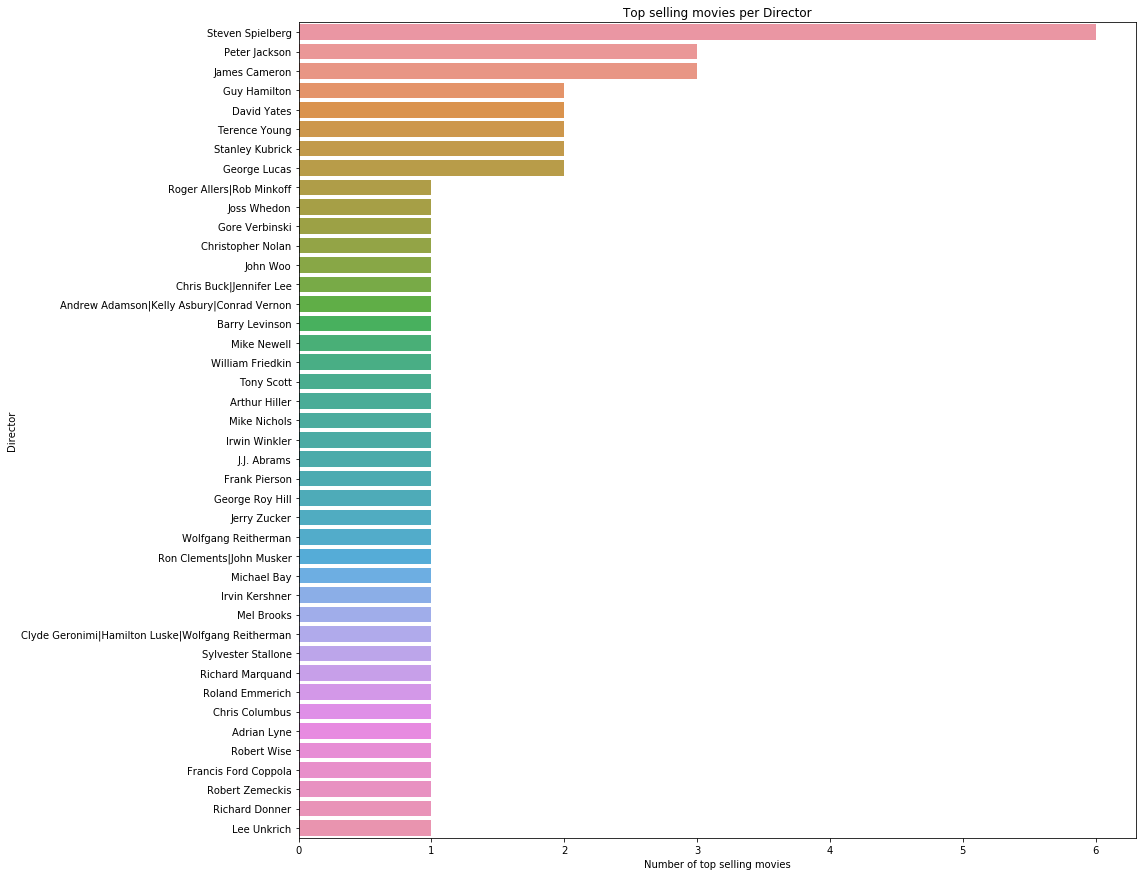

In [ ]:
#Plotting number of top selling movies epr director
ax = sns.barplot(x= dir_count.top_seller_movies, y= dir_count.index, orient='h')#make it bigger, better labels
plt.xlabel("Number of top selling movies")
plt.ylabel("Director")
plt.title("Top selling movies per Director");

**FINDING**: Steven Spielberg is only director whose movies were the year top seller for 6 times. These are as many as double compared to both Peter Jackson and James Cameron which are on the second place with  3 times.

**LIMITATIONS**: this analysis doesn't take into account the total number of movies of each director. It is possible that Spielberg has more top seller movies due to higher amount of movies directed compare to a professionally younger Joss Whedon. However, using a ratio or percentage will elimanate any consistency information. In other words, having directed more top sellers even out of a large number of total movies is still a more important information in terms of successful director than who has a better top-sellers/total_movies ratio.

## Budget increase/decrease and profitability in most recent movies


In [ ]:
#Creating the mean_per_year function to calculate yearly mean values

def mean_per_year(df_column):
    df_c_mean = df.groupby('release_year')[df_column].mean()
    df_c_mean = df_c_mean.to_frame()
    return df_c_mean

In [ ]:
# Calculating profit mean per year

pf_avg = mean_per_year('profit')
pf_avg.head()

,profit
release_year,
1960,"159,548,143.27"
1961,"218,177,034.61"
1962,"171,849,262.68"
1963,"136,958,883.57"
1964,"295,952,551.52"


In [ ]:
# Calculating budget_adj mean per year

bg_avg = mean_per_year('budget_adj')
bg_avg.head()

,budget_adj
release_year,
1960,"30,681,790.10"
1961,"28,185,155.25"
1962,"40,624,758.32"
1963,"72,524,960.38"
1964,"34,081,893.78"


In [ ]:
# Calculating revenue mean per year

rv_avg = mean_per_year('revenue_adj')
rv_avg.head()

,revenue_adj
release_year,
1960,"190,229,933.36"
1961,"246,362,189.86"
1962,"212,474,021.01"
1963,"209,483,843.96"
1964,"330,034,445.30"


In [ ]:
#merging all in one new dataframe
df_pf_avg = df.merge(pf_avg, left_on= 'release_year', right_index=True)
df_pf_avg.rename(columns={'profit_x':'profit','profit_y':'prof_avg'}, inplace= True)

In [ ]:
df_bp_avg = df_pf_avg.merge(bg_avg, left_on= 'release_year', right_index=True)
df_bp_avg.rename(columns={'budget_adj_x':'budget_adj','budget_adj_y':'budget_adj_avg'}, inplace= True)

In [ ]:
df_bpr_avg = df_bp_avg.merge(rv_avg, left_on= 'release_year', right_index=True)
df_bpr_avg.rename(columns={'revenue_adj_x':'revenue_adj','revenue_adj_y':'revenue_adj_avg'}, inplace= True)
df_bpr_avg.head()

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj,profit,prof_avg,budget_adj_avg,revenue_adj_avg
0,135397,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,"137,999,939.28","1,392,445,892.52","1,254,445,953.24","109,434,787.17","41,231,952.64","150,666,739.81"
1,76341,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,"137,999,939.28","348,161,292.49","210,161,353.21","109,434,787.17","41,231,952.64","150,666,739.81"
2,262500,13.11,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,"101,199,955.47","271,619,025.41","170,419,069.94","109,434,787.17","41,231,952.64","150,666,739.81"
3,140607,11.17,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,"183,999,919.04","1,902,723,129.80","1,718,723,210.76","109,434,787.17","41,231,952.64","150,666,739.81"
4,168259,9.34,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,"174,799,923.09","1,385,748,801.47","1,210,948,878.38","109,434,787.17","41,231,952.64","150,666,739.81"


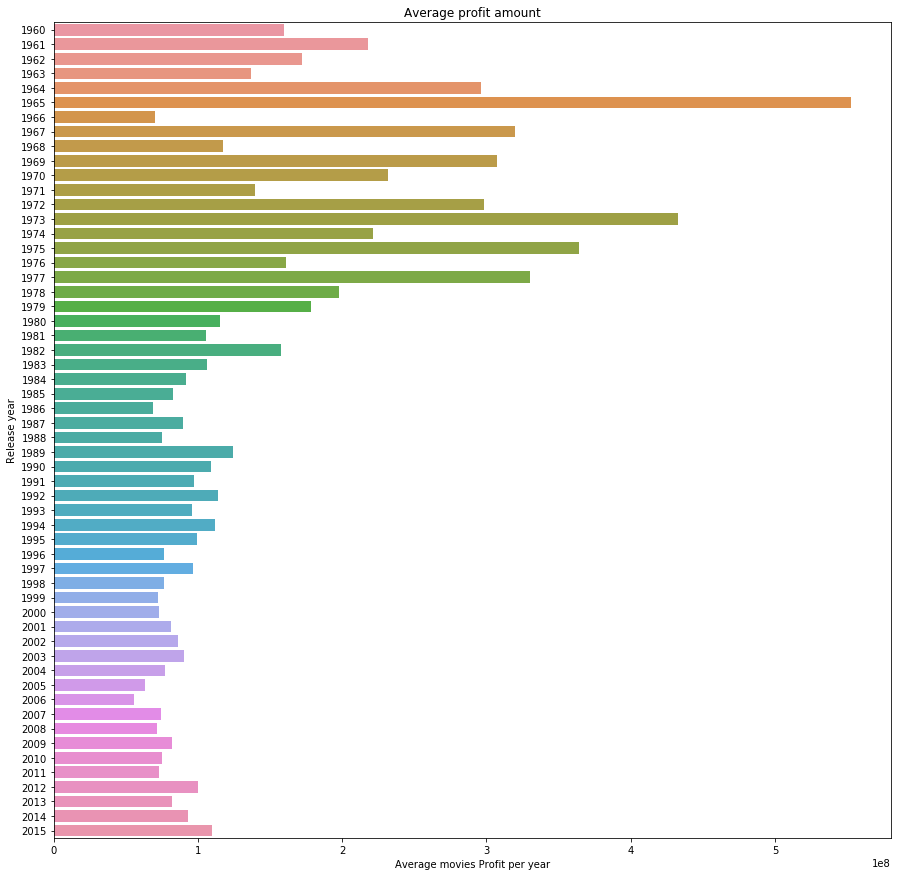

In [ ]:
prft = sns.barplot(x= 'prof_avg', y='release_year', data= df_bpr_avg,orient='h' )
plt.xlabel("Average movies Profit per year")
plt.ylabel("Release year")
plt.title("Average profit amount");

** Before 1980 approximately, the  average movie profit was higher than the following years. However, several peaks or  potential outliers can be noticed in the same early period compared to the more steady following years.**

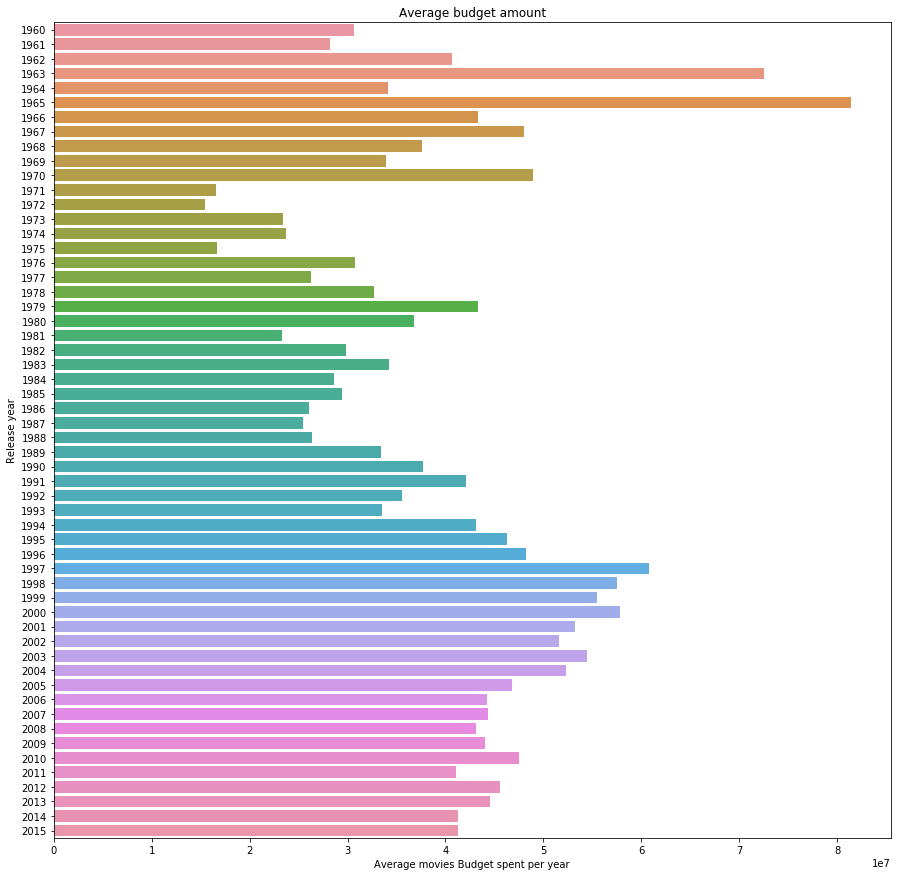

In [ ]:
bdgt = sns.barplot(x= 'budget_adj_avg', y='release_year', data= df_bpr_avg, orient='h' )
plt.xlabel("Average movies Budget spent per year")
plt.ylabel("Release year")
plt.title("Average budget amount");

**After 1990 approximately, a significant increase of the average budget per year for a movie compared to the previous years can be noticed.**

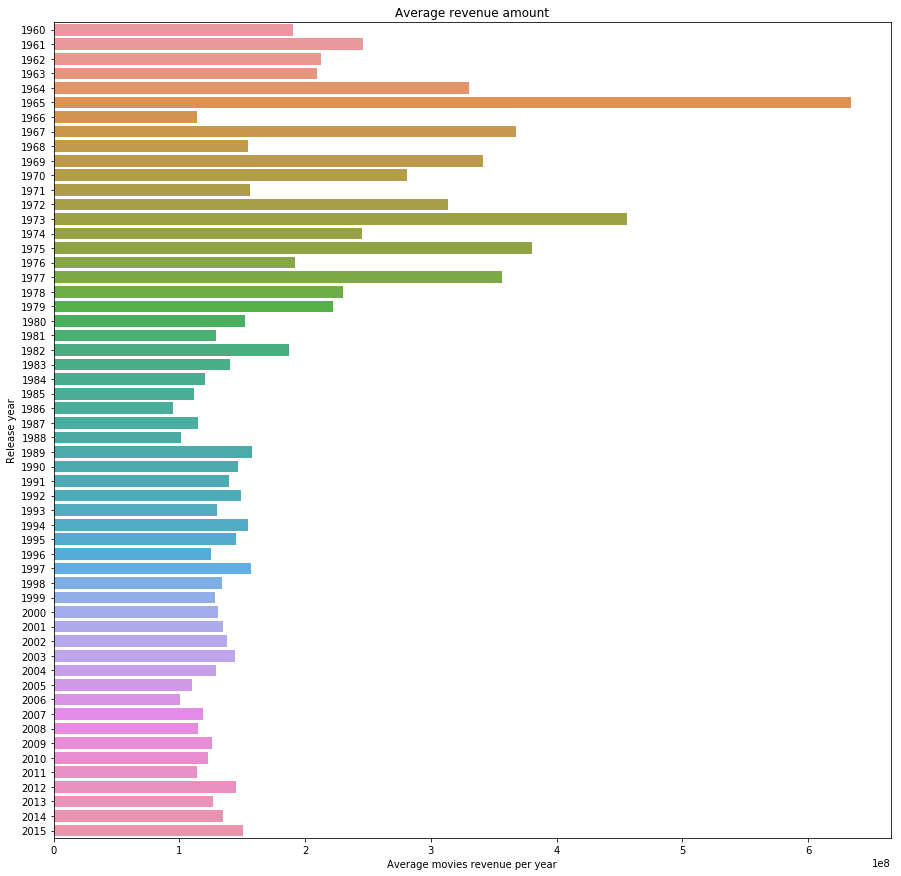

In [ ]:
rvnu = sns.barplot(x= 'revenue_adj_avg', y='release_year', data= df_bpr_avg, orient= 'h' )
plt.xlabel("Average movies revenue per year")
plt.ylabel("Release year")
plt.title("Average revenue amount");

**From 1980 approximately, a significant decrease in the average movie revenue per year can be noticed.**

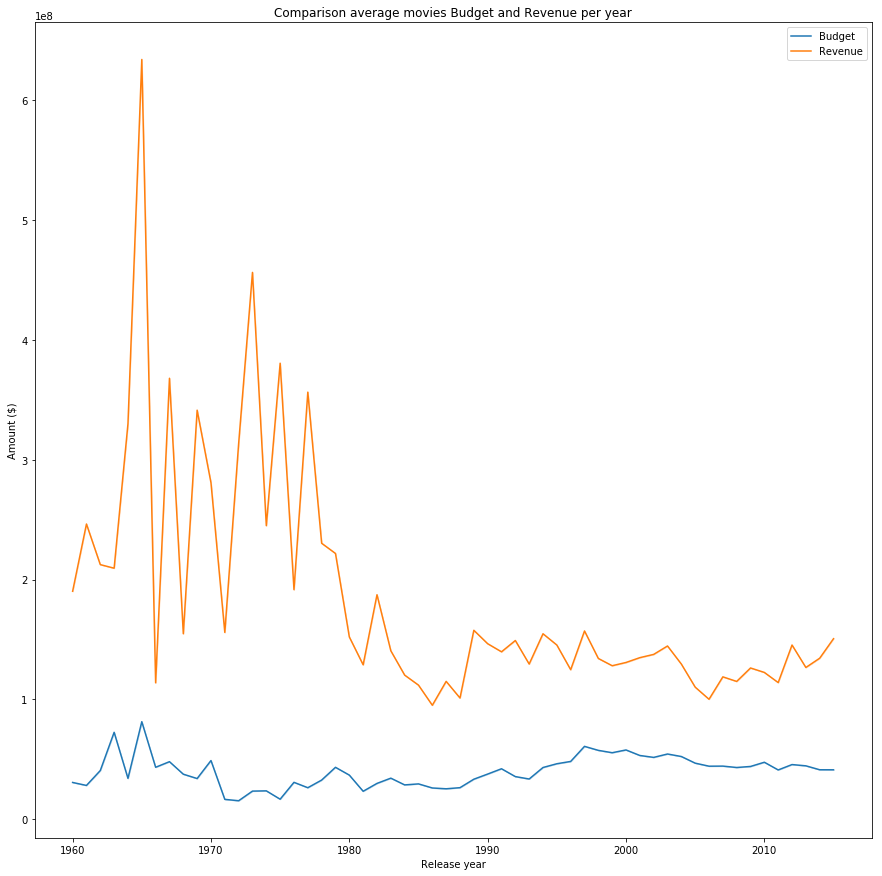

In [ ]:
# Comparing average budget and revenue on a same scale line chart

bgt = sns.lineplot(x= 'release_year', y='budget_adj_avg', data= df_bpr_avg, label= 'Budget') # blue
rvn = sns.lineplot(x= 'release_year', y='revenue_adj_avg', data= df_bpr_avg, label= 'Revenue');# orange
plt.xlabel("Release year")
plt.ylabel("Amount ($)")
plt.title("Comparison average movies Budget and Revenue per year")
plt.show()

**FINDINGS**: Despite an increased budget, movies before 1980 were on avearge more profitable than those coming out during the following years, suggesting that the budget amount does not lead to a profitable movie.

**LIMITATIONS**: This analysis cannot be definitive as it doesn't compare directly budet and profit. Additionally, the overall number of movie released each year changes and with it the outliers degree of disturbance of the mean value. In other words, large profit movies have an stronger impact on years where fewer movies were released, potentially altering the true profit mean value for that year.

The next step will be then, remove the outliers and plot the regression line for the  budget-profit pair.

In [ ]:
# Calculating the 90th quantile for budget_adj, profit and popularity_q to remove outliers

budget_adj_q = df.budget_adj.quantile(0.9)
profit_q = df.profit.quantile(0.9)
popularity_q = df.popularity.quantile(0.9)

budget_adj_q, profit_q, popularity_q

(103100641.60457912, 275990013.5858319, 2.452755100000001)

In [ ]:
# Taking the 90th percentile of budget_adj and profit

df_q = df.loc[: ,['budget_adj', 'profit'] ]  
df_q = df_q.query('budget_adj<=@budget_adj_q and profit<=@profit_q')
df_q.head()  

,budget_adj,profit
2,"101,199,955.47","170,419,069.94"
12,"13,799,993.93","20,119,852.03"
13,"80,959,964.38","143,186,060.72"
15,"40,479,982.19","102,819,262.40"
16,"44,159,980.57","255,549,597.64"


In [ ]:
df_q['intercept']= 1

lm= sm.OLS(df_q['profit'], df_q[['intercept', 'budget_adj']])
results = lm.fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     166.9
Date:                Sun, 05 May 2019   Prob (F-statistic):           2.86e-37
Time:                        11:20:28   Log-Likelihood:                -62934.
No. Observations:                3248   AIC:                         1.259e+05
Df Residuals:                    3246   BIC:                         1.259e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.166e+07   1.75e+06     12.352      0.000    1.82e+07    2.51e+07
budget_adj     0.5601      0.043     12.919      0.000       0.475       0.645
==============================================================================
Omnibus:                      568.460   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1021.096
Skew:                           1.103   Prob(JB):                    1.87e-222
Kurtosis:                       4.638   Cond. No.                     6.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

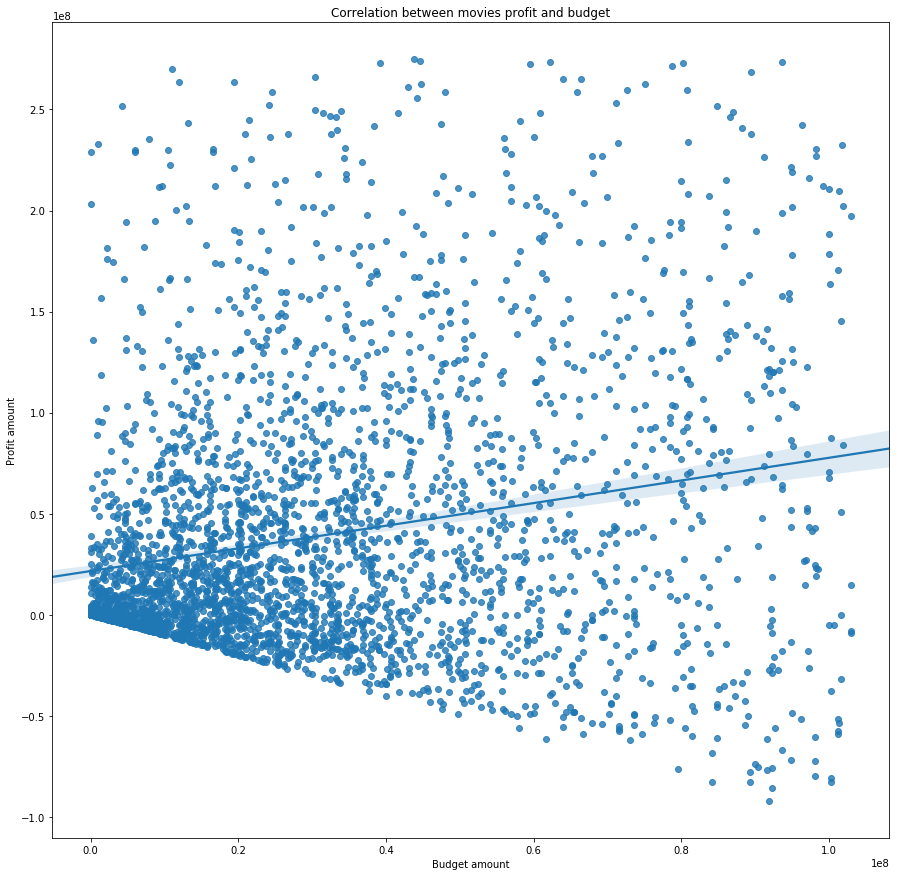

In [ ]:
# Plotting profit over budget
sns.regplot(x= 'budget_adj', y= 'profit', data = df_q)
plt.xlabel("Budget amount")
plt.ylabel("Profit amount")
plt.title("Correlation between movies profit and budget");

**FINDINGS**: Conversly from above, there is a positive correlation between movies budget and profit. Indeed, the p-value smaller of 0.05 confirms the correlation exists. However, a R-squared value of 0.049 and the scatter plot show us that the correlation is weak.

### Correlation Profit-Popularity

The aim of this section is to determine whether exist a positive correlation between popular movies and profitable movies.

In [ ]:
# Exploring the values distribution of the profit column
df.profit.describe()

count           3,854.00
mean       92,824,697.22
std       194,071,459.74
min      -413,912,431.00
25%        -1,504,994.63
50%        27,370,641.16
75%       107,454,751.41
max     2,750,136,650.92
Name: profit, dtype: float64

For this analysis I have considered the profit mean value as the threshold to qualify as profitable movies as those are the ones that had a profit above average.

In [ ]:
#adding mask for profitable movies
pf_mean= df.profit.mean()
yes = df.profit>=pf_mean        
no = df.profit<pf_mean

In [ ]:
# take the 90th quantile to remove outliers
df_pop_90 = df.query('popularity <= @popularity_q')
df_pop_90.head()

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj,profit
63,238713,2.40,Spy,Melissa McCarthy|Jason Statham|Rose Byrne|Mira...,Paul Feig,Action|Comedy|Crime,2015,"59,799,973.69","216,812,826.08","157,012,852.39"
64,256591,2.40,Focus,Will Smith|Margot Robbie|Rodrigo Santoro|Rober...,Glenn Ficarra|John Requa,Romance|Comedy|Crime|Drama,2015,"46,091,979.72","141,645,863.64","95,553,883.92"
65,249070,2.35,Hitman: Agent 47,Rupert Friend|Zachary Quinto|Hannah Ware|Emili...,Aleksander Bach,Action|Crime|Thriller,2015,"32,199,985.83","75,759,810.19","43,559,824.35"
66,205775,2.35,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,2015,"91,999,959.52","86,315,059.38","-5,684,900.14"
68,312221,2.33,Creed,Michael B. Jordan|Sylvester Stallone|Graham Mc...,Ryan Coogler,Drama,2015,"32,199,985.83","126,900,665.80","94,700,679.97"


In [ ]:
# comparing the popularity mean values of profitable vs not profitable movies
df_pop_90.popularity[yes].mean(), df_pop_90.popularity[no].mean()

(1.2657287406931947, 0.7251204708069917)

**The popularity mean values for the profitable movies is significantly bigger than the not profitable movies. This suggest a positive correlation between popularity and profitability of a movie.**

I will now proceed to verify such correlation

In [ ]:
#Taking the 90th percentile of popularity and profit

df_q2 = df.loc[: ,['popularity', 'profit'] ]  
df_q2 = df.query('popularity<=@popularity_q and profit<=@profit_q')
df_q2.head()   

,id,popularity,original_title,cast,director,genres,release_year,budget_adj,revenue_adj,profit
63,238713,2.40,Spy,Melissa McCarthy|Jason Statham|Rose Byrne|Mira...,Paul Feig,Action|Comedy|Crime,2015,"59,799,973.69","216,812,826.08","157,012,852.39"
64,256591,2.40,Focus,Will Smith|Margot Robbie|Rodrigo Santoro|Rober...,Glenn Ficarra|John Requa,Romance|Comedy|Crime|Drama,2015,"46,091,979.72","141,645,863.64","95,553,883.92"
65,249070,2.35,Hitman: Agent 47,Rupert Friend|Zachary Quinto|Hannah Ware|Emili...,Aleksander Bach,Action|Crime|Thriller,2015,"32,199,985.83","75,759,810.19","43,559,824.35"
66,205775,2.35,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,2015,"91,999,959.52","86,315,059.38","-5,684,900.14"
68,312221,2.33,Creed,Michael B. Jordan|Sylvester Stallone|Graham Mc...,Ryan Coogler,Drama,2015,"32,199,985.83","126,900,665.80","94,700,679.97"


In [ ]:
# Computing the regression line


df_q2['intercept']= 1

lm= sm.OLS(df_q2['profit'], df_q2[['intercept', 'popularity']])
results = lm.fit()
results.summary()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     723.8
Date:                Sun, 05 May 2019   Prob (F-statistic):          3.81e-144
Time:                        11:20:29   Log-Likelihood:                -63038.
No. Observations:                3262   AIC:                         1.261e+05
Df Residuals:                    3260   BIC:                         1.261e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.435e+06   1.96e+06     -3.287      0.001   -1.03e+07    -2.6e+06
popularity  5.488e+07   2.04e+06     26.903      0.000    5.09e+07    5.89e+07
==============================================================================
Omnibus:                      534.999   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1304.545
Skew:                           0.915   Prob(JB):                    5.27e-284
Kurtosis:                       5.500   Cond. No.                         3.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

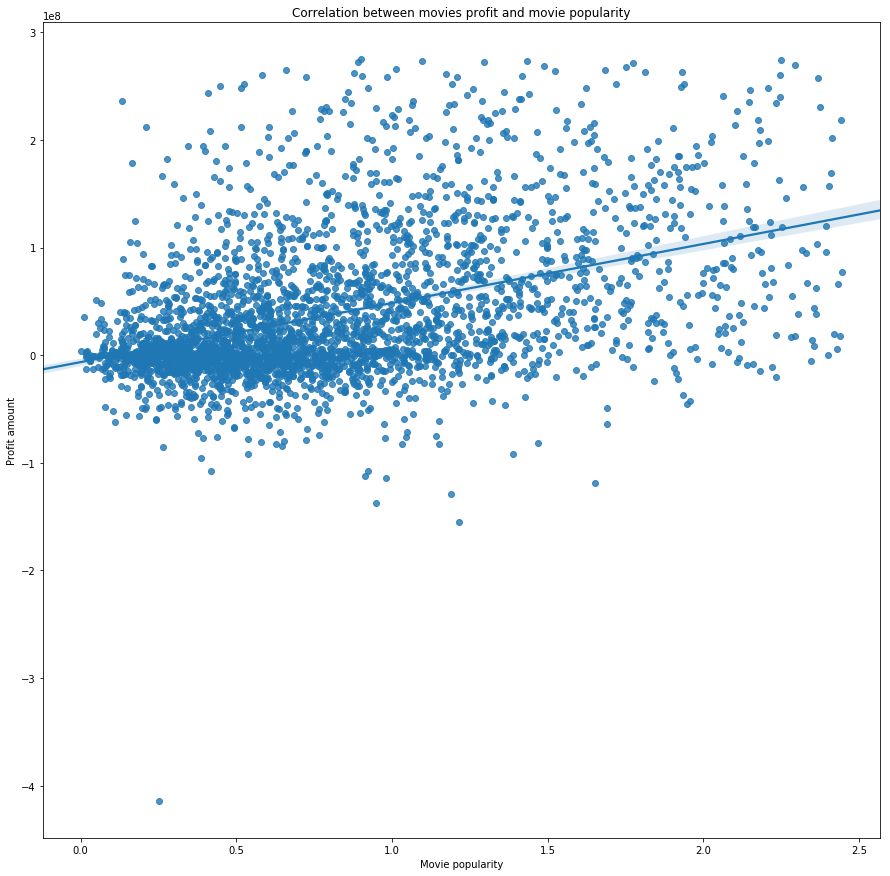

In [ ]:
# Plotting the regression line

sns.regplot(x= 'popularity', y= 'profit', data = df_q2)
plt.xlabel("Movie popularity")
plt.ylabel("Profit amount")
plt.title("Correlation between movies profit and movie popularity");

**FINDINGS**: There is a positive correlation between profit and popularity. Indeed, the p-value smaller of 0.05 confirms the correlation exists. Additionally, a R-squared value of 0.181 and the scatter plot show us medium strength correlation. 

**LIMITATIONS**: Firstly, I have arbitrarily selected as profitable movies those whose profit was equal or greater then the mean value, but technically, though arguebly, even 1$ profit can qualify as profitable movie and therefore producing different results. However, I wouldn't expect the direction of the correlation to change since I took the 90th percentile for the analysis.
    Secondly, is not clear how the popularity has been measured and what is the threshold value for a popular movie. Further investigation is needed of the popularity metric in order to use it for making a profitable movie.

### Correlation Budget-Popularity

The aim of this section is to determine whether exist a positive correlation between Budget spent and popularity of a movie.

In [ ]:
#Taking the 90th percentile of popularity and budget_adj

df_q3 = df.loc[: ,['popularity', 'budget_adj'] ]  
df_q3 = df_q3.query('budget_adj<=@budget_adj_q and popularity<=@popularity_q') 
df_q3.head()   

,popularity,budget_adj
63,2.40,"59,799,973.69"
64,2.40,"46,091,979.72"
65,2.35,"32,199,985.83"
66,2.35,"91,999,959.52"
68,2.33,"32,199,985.83"


In [ ]:
df_q3['intercept']= 1
lm= sm.OLS(df_q3['popularity'], df_q3[['intercept', 'budget_adj']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     344.2
Date:                Sun, 05 May 2019   Prob (F-statistic):           4.33e-73
Time:                        11:20:31   Log-Likelihood:                -2296.5
No. Observations:                3232   AIC:                             4597.
Df Residuals:                    3230   BIC:                             4609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6122      0.014     44.354      0.000       0.585       0.639
budget_adj  6.295e-09   3.39e-10     18.552      0.000    5.63e-09    6.96e-09
==============================================================================
Omnibus:                      389.784   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.946
Skew:                           0.952   Prob(JB):                    2.08e-118
Kurtosis:                       3.631   Cond. No.                     6.48e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

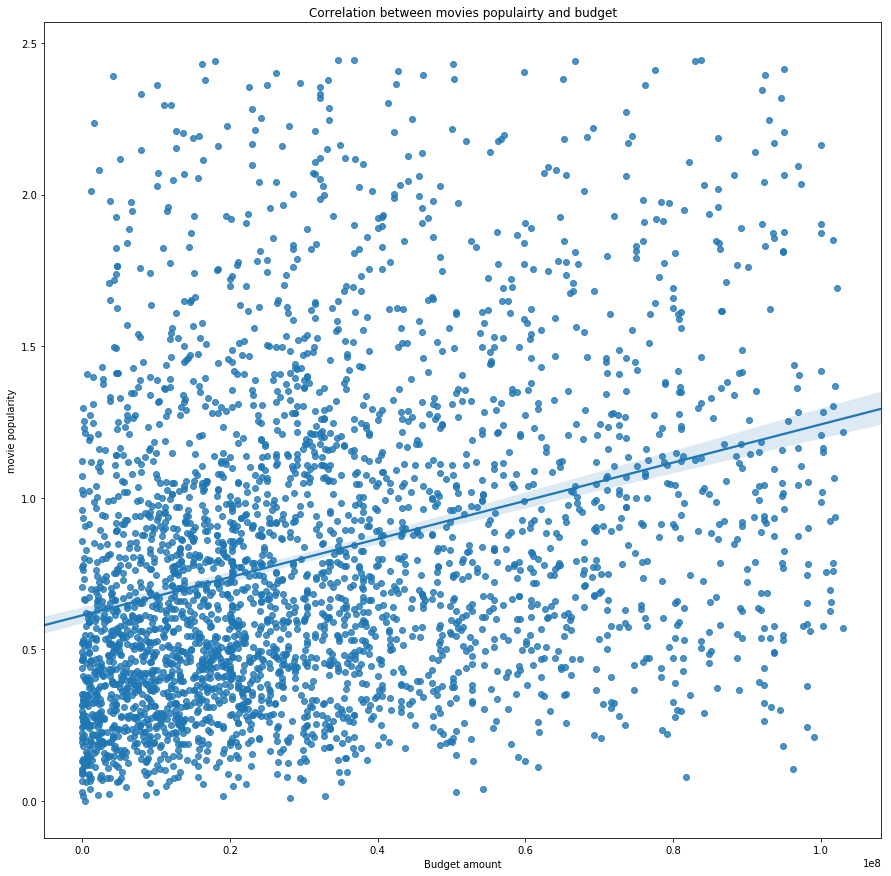

In [ ]:
sns.regplot(x = 'budget_adj', y='popularity', data= df_q3)
plt.xlabel("Budget amount")
plt.ylabel("movie popularity")
plt.title("Correlation between movies populairty and budget");

**FINDINGS**: There is a positive correlation between profit and popularity. Indeed, the p-value smaller of 0.05 confirms the correlation exists. However, a R-squared value of 0.096 and the scatter plot show us that the correlation is weak, but slightly stronger than budget-profit correlation.

### Bar chart comparison of genres trends over the years

The aim of the section is to explore the movie genre distribution across the years.

In [ ]:
# creating dummies for each genre per movies
dummies = df.genres.str.get_dummies(sep='|')
dummies.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# concatenating the dummies dataframe to df3 to creata a dataframe with movie title, release year and 
# genre classification

df3=pd.concat([df,dummies], axis=1)
df3.drop(['genres','id','popularity',
          'cast','director',
          'budget_adj','revenue_adj','profit'], axis = 1, inplace = True)
df3.head()

,original_title,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Jurassic World,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,Mad Max: Fury Road,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,Insurgent,2015,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,Star Wars: The Force Awakens,2015,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Furious 7,2015,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# melting the df3 to the long format

df3_long = df3.melt(id_vars = ['original_title', 'release_year'], var_name = 'genre', value_name = 'movies')
df3_long.head()

,original_title,release_year,genre,movies
0,Jurassic World,2015,Action,1
1,Mad Max: Fury Road,2015,Action,1
2,Insurgent,2015,Action,0
3,Star Wars: The Force Awakens,2015,Action,1
4,Furious 7,2015,Action,1


In [ ]:
df3_long.groupby(['release_year','genre'])
#df3_long.movies.replace(0,np.nan, inplace=True)
df3_long.head()

,original_title,release_year,genre,movies
0,Jurassic World,2015,Action,1
1,Mad Max: Fury Road,2015,Action,1
2,Insurgent,2015,Action,0
3,Star Wars: The Force Awakens,2015,Action,1
4,Furious 7,2015,Action,1


In [ ]:
# filtering for rows with positive ("1" instead od "0") values in the "movies" column
# dropping rows with zero values

df3_long = df3_long.query('movies==1')
df3_long.drop(['movies'], axis=1, inplace=True)
df3_long.head()

,original_title,release_year,genre
0,Jurassic World,2015,Action
1,Mad Max: Fury Road,2015,Action
3,Star Wars: The Force Awakens,2015,Action
4,Furious 7,2015,Action
6,Terminator Genisys,2015,Action


In [ ]:
df3_long.release_year.min(), df3_long.release_year.max() # finding the earlies and latest release year respectively

(1960, 2015)

In [ ]:
# classifing movies under "period" categories

bin_edges = [1959, 1969, 1979,1989,1999,2009,2015]
bin_labels =['60s', '70s', '80s', '90s','00s', '10s']
df3_long['period'] = pd.cut(df3_long['release_year'], bin_edges, labels=bin_labels)
df3_long.head()

,original_title,release_year,genre,period
0,Jurassic World,2015,Action,10s
1,Mad Max: Fury Road,2015,Action,10s
3,Star Wars: The Force Awakens,2015,Action,10s
4,Furious 7,2015,Action,10s
6,Terminator Genisys,2015,Action,10s


In [ ]:
# Counting the occurences per genre per period

df5 = df3_long.groupby(['period', 'genre']).count()
df5 = df5.drop(['release_year'], axis=1)
df5 = df5.reset_index()
df5.head()

,period,genre,original_title
0,60s,Action,19.00
1,60s,Adventure,23.00
2,60s,Animation,2.00
3,60s,Comedy,16.00
4,60s,Crime,9.00


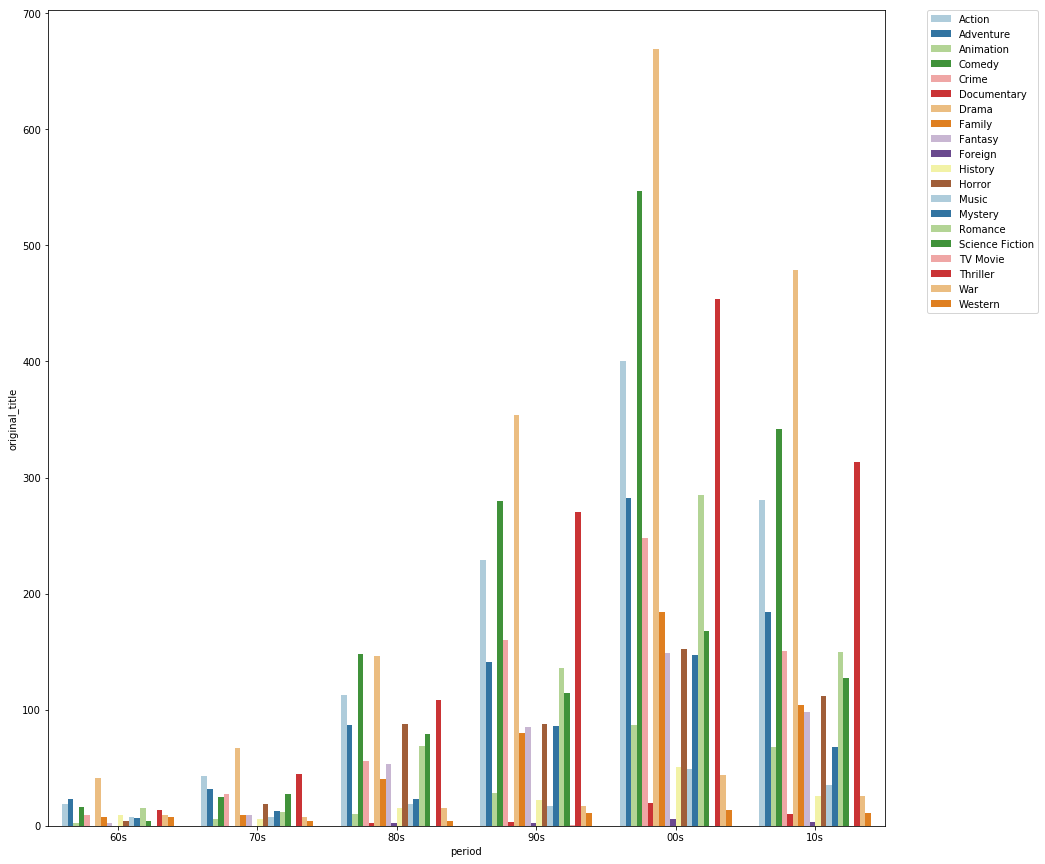

In [ ]:
#Plotting the occurences per genre per period

sns.barplot(x='period', y='original_title', hue='genre', data= df5, palette="Paired")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**FINDINGS**: Interestingly,for each period Drama is consistently the most dominant genre. Similarly, comedies follow in second position. As third most produced genre, we can appreciate a shift from Action movies in the old periods to Thrillers in most recent years.

**LIMITATIONS**: I have divided the years span in 6 periods, so the results are not as accurate as if the analysis was done year by year. Such analys will reveal years with results different from the overall oeriod results where those unusual results are masked by the others.

# CONCLUSIONS
           
           

It was a very interesting analysis, after which I can conclude the following:

The most successful director in terms of number of year best selling movies is Steven Spielberg.

Despite an increase in the yearly average movie budget in most recent years, the yeraly average profit decreased. However, a positive, though weak, correlation between movie budget and profit exists.

A stronger positive correlation has been found instead between popular movie and profit, although unclear how the popularity metric has been calculated. This may identify the popularity metric as a good predictor for a profitable movie. Additionally, the weakness of the positive correlation between budget and popularity shows that not always spending more lead to popular and profitable movies.

Lastly, the four most rapresented genres were always the same for every period analysed. Interestingly enough, the only change over the years involved thrillers which surpassed action movies as third most rapresented genre in recent period. Conversly the lead of drama movies, followed by comedies kept steady in first and second place resperctively across all periods.